In [141]:
import random
# from scipy.constants import k
from scipy.constants import pi
# from scipy.constants import e
import numpy as np
import time
import os

random.seed()
    
N = 2


k = 1
sigma = 1
ep = 1
T = 1
m0 = 1
side = 6
side_p = side / 2
 
time = 0.001
period = 5
epoches = int(period / time)

In [144]:
def Maxvellv(v, T, mo):
    return (m0 / (2 * pi * k * T)) ** (3 / 2) * np.exp(- m0 * v ** 2 / (2 * k * T))

def Maxvellv_i(T, m0, v_m, m):
    flag = 0
    while flag == 0:
        v_i = v_m[random.randint(0, len(v_m) - 1)]
        m_i = m[random.randint(0, len(m) - 1)]
        if Maxvellv(v_i, T, m0) >= m_i:
            flag += 1
            
    return v_i

def Maxvell_v2(T, m0, n1, n2, N):
    m_max = (m0 / (2 * pi * k * T)) ** (3 / 2)
    v_max = (8 * k * T / m0) ** 0.5
    dv = 2 * v_max / n1
    dm = m_max / n2
    v_m = np.arange(-v_max, v_max + dv, dv)
    m = np.arange(0, m_max + dm, dm) 
    
    v = []
    
    for i in range(N):
        v_i = []
        for j in range(3):
            v_i.append(Maxvellv_i(T, m0, v_m, m))
        v.append(v_i)
        
    return v

def socm(v, N):
    v_x = np.zeros(N)
    v_y = np.zeros(N)
    v_z = np.zeros(N)
    
    for i in range(N):
        v_x[i] += v[i][0]
        v_y[i] += v[i][1]
        v_z[i] += v[i][2]
        
    v_x0 = np.mean(v_x)
    v_x -= v_x0 * np.ones(N)

    v_y0 = np.mean(v_y)
    v_y -= v_y0 * np.ones(N)
    
    v_z0 = np.mean(v_z)
    v_z -= v_z0 * np.ones(N)
    
    for i in range(N):
        v[i][0] = v_x[i]
        v[i][1] = v_y[i]
        v[i][2] = v_z[i]
    
    return v


def L(x, y, z, x_i, y_i, z_i):
    lenth_v = [x - x_i, y - y_i, z - z_i]
    lenth = (lenth_v[0] ** 2 + lenth_v[1] ** 2 + lenth_v[2] ** 2) ** (1 / 2)
    
    return (lenth, lenth_v)


def LocationIn(N, epoches):
    history_x = [[0 for i in range(epoches + 1)] for i in range(N)]
    history_y = [[0 for i in range(epoches + 1)] for i in range(N)]
    history_z = [[0 for i in range(epoches + 1)] for i in range(N)]


#     for i in range(N):
#         history_x[i][0] = 10 ** -3 * random.randint(-int(side_p * 10 ** 3), int(side_p * 10 ** 3))
#         history_y[i][0] = 10 ** -3 * random.randint(-int(side_p * 10 ** 3), int(side_p * 10 ** 3))
#         history_z[i][0] = 10 ** -3 * random.randint(-int(side_p * 10 ** 3), int(side_p * 10 ** 3))

    history_x[0][0] = 2.9
    history_y[0][0] = 2.9
    history_z[0][0] = 2.9
    history_x[1][0] = -2.9
    history_y[1][0] = -2.9
    history_z[1][0] = -2.9
    
#     history_x[0][0] = -0.49848349581693524
#     history_x[1][0] = 0.49848349581693524
    
    
    return (history_x, history_y, history_z)

def Energy(epoch):
    E_p = 0
    E_k = 0
    
    for n in range(N):
        x, y, z = history_x[n][epoch], history_y[n][epoch], history_z[n][epoch]
        for i in range(N):
            if i != n:
                x_i, y_i, z_i = history_x[i][epoch], history_y[i][epoch], history_z[i][epoch]
                
                if abs(x - (x_i + side)) <= side_p:
                    x_i = x_i + side
                elif abs(x - (x_i - side)) <= side_p:
                    x_i = x_i - side

                if abs(y - (y_i + side)) <= side_p:
                    y_i = y_i + side
                elif abs(y - (y_i - side)) <= side_p:
                    y_i = y_i - side

                if abs(z - (z_i + side)) <= side_p:
                    z_i = z_i + side
                elif abs(z - (z_i - side)) <= side_p:
                    z_i = z_i - side

                lenth = L(x, y, z, x_i, y_i, z_i)
                
#                 lenth = sorted([L(x, y, z, x_i, y_i, z_i), L(x, y, z, x_i + side, y_i, z_i), L(x, y, z, x_i - side, y_i, z_i), L(x, y, z, x_i, y_i + side, z_i), L(x, y, z, x_i, y_i - side, z_i), L(x, y, z, x_i, y_i, z_i + side), L(x, y, z, x_i, y_i, z_i - side)], key=lambda x: x[0])[0]
#                 if lenth[0] == 0:
#                     print(lenth[1], n, i)
                E_p += 4 * ep * ((sigma / lenth[0]) ** 12 - (sigma / lenth[0]) ** 6)
            else:
                E_k += m0 / 2 * (v[i][0]**2 + v[i][1]**2 + v[i][2]**2)
    
    return E_k + E_p / 2



def Momentum(v):
    p_x = 0
    p_y = 0
    p_z = 0
    
    for i in range(N):
        p_x += v[i][0]
        p_y += v[i][1]
        p_z += v[i][2]
    
    p_x *= m0
    p_y *= m0
    p_z *= m0
    
    return [p_x, p_y, p_z]


def EnegyMomentumIn(epoches):
    history_E = [0 for i in range(epoches + 1)]
    history_dEE = [0 for i in range(epoches)]
    history_p = [[0 for i in range(epoches + 1)] for i in range(3)]
    
    history_E[0] = Energy(0)
    p_i = Momentum(v)
    history_p[0][0] = p_i[0]
    history_p[1][0] = p_i[1]
    history_p[2][0] = p_i[2]

    os.mkdir('C:/Users/Xiaomi/PhysModel/Gas/forovito')
    
    out = open('C:/Users/Xiaomi/PhysModel/Gas/forovito/E.txt', 'a')
    out.write("{} {}\n".format(0, history_E[0]))
    out.close()
    
    out = open('C:/Users/Xiaomi/PhysModel/Gas/forovito/p.txt', 'a')
    out.write("{} {} {} {}\n".format(0, history_p[0][0], history_p[1][0], history_p[2][0]))
    out.close()
    
    print(len((history_E, history_p, history_dEE)))
    return (history_E, history_p, history_dEE)
    

def EnegyMomentum(epoch):
    history_E[epoch] = Energy(epoch)
    p_i = Momentum(v)
    history_p[0][epoch] = p_i[0]
    history_p[1][epoch] = p_i[1]
    history_p[2][epoch] = p_i[2]
    
    history_dEE[epoch - 1] = history_E[epoch] - history_E[epoch - 1] / history_E[epoch]
    
    out = open('C:/Users/Xiaomi/PhysModel/Gas/forovito/E.txt', 'a')
    out.write("{} {}\n".format(epoch, history_E[epoch]))
    out.close()
    
    out = open('C:/Users/Xiaomi/PhysModel/Gas/forovito/p.txt', 'a')
    out.write("{} {} {} {}\n".format(epoch, history_p[0][epoch], history_p[1][epoch], history_p[2][epoch]))
    out.close()

def forovito(epoch, N):
    out = open('C:/Users/Xiaomi/PhysModel/Gas/forovito/{}.xyz'.format(epoch), 'a')
    out.write("{}\n".format(N))
    out.write("Lattice=\"1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0\" Properties=pos:R:3:velo:R:3 Time=0\n")
    for i in range(N):
        out.write("{} {} {} {} {} {}\n".format(history_x[i][epoch], history_y[i][epoch], history_z[i][epoch], v[i][0], v[i][1], v[i][2]))
    out.close()
    
    
def acceleration(n, epoch):
    a = [0, 0, 0]
    x, y, z = history_x[n][epoch - 1], history_y[n][epoch - 1], history_z[n][epoch - 1]
    for i in range(N):
        if i != n:
            x_i, y_i, z_i = history_x[i][epoch - 1], history_y[i][epoch - 1], history_z[i][epoch - 1]
 
            
            if abs(x - (x_i + side)) <= side_p:
                x_i = x_i + side
                
            elif abs(x - (x_i - side)) <= side_p:
                x_i = x_i - side
                
            if abs(y - (y_i + side)) <= side_p:
                y_i = y_i + side
            elif abs(y - (y_i - side)) <= side_p:
                y_i = y_i - side
                
            if abs(z - (z_i + side)) <= side_p:
                z_i = z_i + side
            elif abs(z - (z_i - side)) <= side_p:
                z_i = z_i - side
            
            lenth = L(x, y, z, x_i, y_i, z_i)
            
            
            
#             vari_x0 = [0, side, - side]
#             vari_y0 = [0, side, - side]
#             vari_z0 = [0, side, - side]
#             for vari_x in vari_x0:
#                 for vari_y in vari_y0:
#                     for vari_z in vari_z0:
#                         if (x - (x_i + vari_x)) ** 100 + (y - (y_i + vari_y)) ** 100 + (z - (z_i + vari_z)) ** 100 <= side / 2:
#                             lenth = L(x, y, z, x_i + vari_x, y_i + vari_y, z_i + vari_z)
                
            
    
#             lenth = sorted([L(x, y, z, x_i, y_i, z_i), L(x, y, z, x_i + side, y_i, z_i), L(x, y, z, x_i - side, y_i, z_i), L(x, y, z, x_i, y_i + side, z_i), L(x, y, z, x_i, y_i - side, z_i), L(x, y, z, x_i, y_i, z_i + side), L(x, y, z, x_i, y_i, z_i - side)], key=lambda x: x[0])[0]
            # lenth = L(x, y, z, x_i, y_i, z_i)

#             print(lenth, lenth[0])
            a_i =  - 24 * ep * sigma ** 6 * (lenth[0] ** -7 - 2 * sigma ** 6 * lenth[0] ** -13) / m0
            a_i_x = a_i * lenth[1][0] / lenth[0]
            a_i_y = a_i * lenth[1][1] / lenth[0]
            a_i_z = a_i * lenth[1][2] / lenth[0]
            a[0] += a_i_x
            a[1] += a_i_y
            a[2] += a_i_z
       
    return a

def step(epoch):
#     start_time = time.clock()
    for n in range(N):
        x, y, z = history_x[n][epoch - 1], history_y[n][epoch - 1], history_z[n][epoch - 1]
 
        a = acceleration(n, epoch)
        # print('1 ---- ', a, x, y, n, i)

#         print(a)
        
        # print('2 ---- ', v, v[n])

        x += v[n][0] * time + a[0] * time ** 2 / 2
        y += v[n][1] * time + a[1] * time ** 2 / 2
        z += v[n][2] * time + a[2] * time ** 2 / 2
        
        
        # print('2 ---- ', v, v[n])
#         print(v)
        v[n][0] += a[0] * time
        v[n][1] += a[1] * time
        v[n][2] += a[2] * time
#         print(v)
#         print()
        
        if abs(x) <= side_p:
            history_x[n][epoch] = x
#             print('1x -- ', epoch, n, history_x[n][epoch])
        elif x < 0:
            history_x[n][epoch] = x + side
#             print('2x -- ', epoch, n, x, history_x[n][epoch])
        else:
            history_x[n][epoch] = x - side
#             print('3x -- ', epoch, n, x, history_x[n][epoch])

        if abs(y) <= side_p:
            history_y[n][epoch] = y
#             print('1y -- ', epoch, n, history_y[n][epoch])
        elif y < 0:
            history_y[n][epoch] = y + side
#             print('2y -- ', epoch, n, y, history_y[n][epoch])
        else:
            history_y[n][epoch] = y - side
#             print('3y -- ', epoch, n, y, history_y[n][epoch])

        if abs(z) <= side_p:
            history_z[n][epoch] = z
#             print('1z -- ', epoch, n, history_z[n][epoch])
        elif z < 0:
            history_z[n][epoch] = z + side
#             print('2z -- ', epoch, n, z, history_z[n][epoch])
        else:
            history_z[n][epoch] = z - side
#             print('3z -- ', epoch, n, z, history_z[n][epoch])
        
#         print(history_x[1][:2], history_y[1][:2], history_z[1][:2])
#         print(history_x[2][:2], history_y[2][:2], history_z[2][:2])
    
    
    EnegyMomentum(epoch)

    forovito(epoch, N)
    
#     print("{} ---- {}".format(epoch, time.clock() - start_time))

        # print('3 ---- ', history_x, history_y, v, sep='\n')
        # print()


In [146]:
# v = Maxvell_v2(T, m0, 1000, 1000, N)
# # print(v)
# v = socm(v, N)
# # print(v)

v = [[1, 1, 1], [-1, -1, -1]]

history_x, history_y, history_z = LocationIn(N, epoches)

history_E, history_p, history_dEE = EnegyMomentumIn(epoches)

forovito(0, N)

# print(history_E, history_p, v)


for i in range(1, epoches + 1, 1):
#     print(v)
    step(i)
#     print(v)
#     print()
    print(i)

# print(history_x, history_y, v, sep='\n')

3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146


3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786


In [140]:
history_x, history_y, history_z = LocationIn(N, epoches)
print(acceleration(0, 1), acceleration(1, 1))

([-26768689.986282237, -26768689.986282237, -26768689.986282237], 46364731.10830107, (0.3464101615137758, [-0.20000000000000018, -0.20000000000000018, -0.20000000000000018])) ([26768689.986282237, 26768689.986282237, 26768689.986282237], 46364731.10830107, (0.3464101615137758, [0.20000000000000018, 0.20000000000000018, 0.20000000000000018]))


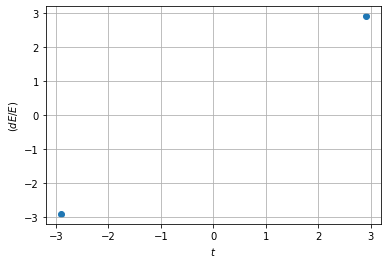

In [147]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(history_x[0][0], history_y[0][0], history_z[0][0], c='g', marker='o')
# ax.scatter(history_x[1][0], history_y[1][0], history_z[1][0], c='b', marker='o')
# # ax.scatter(history_x[2], history_y[2], history_z[2], c='y', marker='o')
# # ax.scatter(history_x[3], history_y[3], history_z[3], c='r', marker='o')

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()
import matplotlib.pyplot as plt
import numpy as np

plt.xlabel('$t$')
plt.ylabel('$(dE/E)$')
plt.grid(True)
plt.scatter([history_x[0][0], history_x[1][0]], [history_y[0][0], history_y[1][0]])
plt.show()

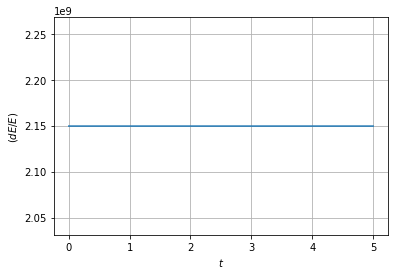

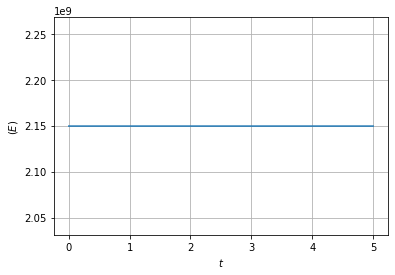

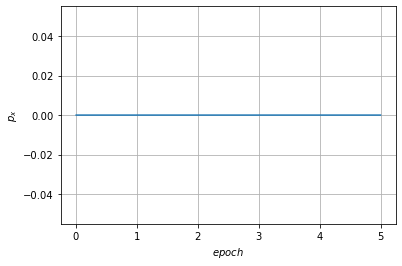

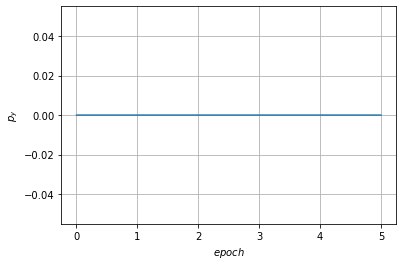

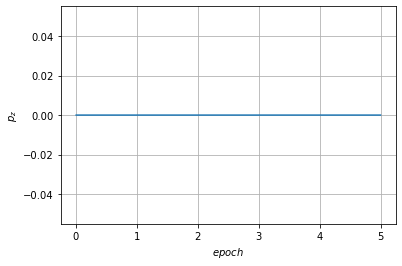

In [150]:
import matplotlib.pyplot as plt
import numpy as np
epoches_ar = np.arange(time, period + time, time)

a, b = 1, epoches + 1

plt.xlabel('$t$')
plt.ylabel('$(dE/E)$')
plt.grid(True)
plt.plot(epoches_ar[a:b], history_dEE[a:b])
plt.show()
plt.xlabel('$t$')
plt.ylabel('$(E)$')
plt.grid(True)
plt.plot(epoches_ar[a:b], history_E[a + 1:b])
plt.show()
plt.xlabel('$epoch$')
plt.ylabel('$p_x$')
plt.grid(True)
plt.plot(epoches_ar[a:b], history_p[0][1+a:b])
plt.show()
plt.xlabel('$epoch$')
plt.ylabel('$p_y$')
plt.grid(True)
plt.plot(epoches_ar[a:b], history_p[1][1+a:b])
plt.show()
plt.xlabel('$epoch$')
plt.ylabel('$p_z$')
plt.grid(True)
plt.plot(epoches_ar[a:b], history_p[2][1+a:b])

In [43]:
for i in range(len(history_p[0])):
    if history_p[1][i] == history_p[2][i]:
        print(i)

In [116]:
print(history_E)
print(v)


[77341480.4839296, 14078696806405.035, 14078696857382.178, 14078696885199.994, 14078696987905.824, 14078696987990.879, 14078706654985.709, 14234597567277.977, 14234597578656.727, 14234597914157.227, 14234597914959.164, 14234597914996.654, 14234597915011.822, 14234597915015.895, 14234597916235.41, 14234597899103.64, 14234597917526.889, 14234597921057.387, 14234597899485.41, 14234597899539.01, 14234597899536.15, 14234597899534.531, 14234597900033.812, 14234597910700.746, 14234597910898.93, 14234597907051.26, 14234597906289.576, 14234597906565.96, 14234597906573.87, 14234597907245.5, 14234597905194.145, 14234597905075.94, 14234598079535.676, 14234620663156.855, 14234620663868.223, 14234620700529.965, 14234620701021.602, 14234620709996.994, 14234620747064.578, 14234660018994.705, 17479739047123.781, 17479739047124.67, 17479739047126.256, 17479739047122.479, 17479739047266.533, 17479739048662.916, 17479739048661.307, 17479739048967.857, 17479739025883.412, 17479739026220.146, 17479739030207

In [26]:
# print(history_x[1][:2], history_y[1][:2], history_z[1][:2])
# print(history_x[2][:2], history_y[2][:2], history_z[2][:2])
# print(history_x, history_y, history_z, sep='\n')

In [19]:
# # import matplotlib.pyplot as plt
# # import numpy as np
# # plt.xlabel('$x$')
# # plt.ylabel('$y$')
# # plt.grid(True)
# # plt.plot(history_x[0], history_y[0], history_x[1], history_y[1])

# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # ax.scatter(history_x[0], history_y[0], history_z[0], c='g', marker='o')
# ax.scatter(history_x[1][:1700], history_y[1][:1700], history_z[1][:1700], c='b', marker='o')
# # ax.scatter(history_x[2], history_y[2], history_z[2], c='y', marker='o')
# # ax.scatter(history_x[3], history_y[3], history_z[3], c='r', marker='o')

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()

In [21]:
out = open('C:/Users/Xiaomi/PhysModel/Gas/forovito/E.txt', 'r')
history_E = []
line = out.readline().strip()
while line != '':
    print(line)
    history_E.append(float(line.split(" ")[1]))
    line = out.readline().strip()
out.close()

0 8.413478713719043
1 8.413479312975019
2 8.413479905133093
3 8.413480490200607
4 8.413481068185408
5 8.413481639095842
6 8.413482202940758
7 8.413482759729506
8 8.413483309471925
9 8.41348385217834
10 8.413484387859569
11 8.413484916526903
12 8.413485438192112
13 8.413485952867436
14 8.413486460565588
15 8.41348696129974
16 8.413487455083528
17 8.413487941931034
18 8.413488421856801
19 8.413488894875812
20 8.413489361003492
21 8.41348982025571
22 8.41349027264876
23 8.413490718199366
24 8.413491156924678
25 8.413491588842264
26 8.413492013970107
27 8.413492432326597
28 8.413492843930538
29 8.413493248801121
30 8.413493646957939
31 8.413494038420982
32 8.413494423210619
33 8.413494801347605
34 8.413495172853064
35 8.413495537748501
36 8.413495896055785
37 8.413496247797141
38 8.413496592995164
39 8.413496931672787
40 8.413497263853303
41 8.413497589560334
42 8.413497908817858
43 8.413498221650167
44 8.413498528081895
45 8.413498828137989
46 8.41349912184372
47 8.413499409224668
48 8.41

In [18]:
print(history_E)

[8.413478713719043, 8.413479312975019, 8.413479905133093, 8.413480490200607, 8.413481068185408, 8.413481639095842, 8.413482202940758, 8.413482759729506, 8.413483309471925, 8.41348385217834, 8.413484387859569, 8.413484916526903, 8.413485438192112, 8.413485952867436, 8.413486460565588, 8.41348696129974, 8.413487455083528, 8.413487941931034, 8.413488421856801, 8.413488894875812, 8.413489361003492, 8.41348982025571, 8.41349027264876, 8.413490718199366, 8.413491156924678, 8.413491588842264, 8.413492013970107, 8.413492432326597, 8.413492843930538, 8.413493248801121, 8.413493646957939, 8.413494038420982, 8.413494423210619, 8.413494801347605, 8.413495172853064, 8.413495537748501, 8.413495896055785, 8.413496247797141, 8.413496592995164, 8.413496931672787, 8.413497263853303, 8.413497589560334, 8.413497908817858, 8.413498221650167, 8.413498528081895, 8.413498828137989, 8.41349912184372, 8.413499409224668, 8.413499690306722, 8.413499965116078, 8.413500233679223, 8.413500496022941, 8.41350075217430

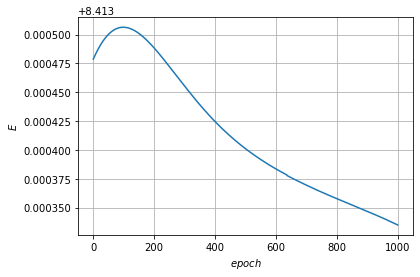

In [20]:
import matplotlib.pyplot as plt
import numpy as np
epoches_ar = np.arange(0, len(history_E), 1)
plt.xlabel('$epoch$')
plt.ylabel('$E$')
plt.grid(True)
plt.plot(epoches_ar[:], history_E[:])
plt.show()

(0.282842712474618, [-0.1999999999999993, -0.1999999999999993, 0])
5.1
5.1
0


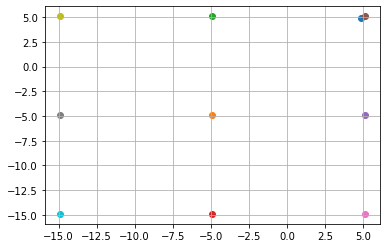

In [44]:
x, y, z, x_i, y_i, z_i = 4.9, 4.9, 0, -4.9, -4.9, 0
plt.scatter(x, y)
plt.grid(True)
vari_x0 = [0, side, - side]
vari_y0 = [0, side, - side]
vari_z0 = [0, side, - side]
for vari_x in vari_x0:
    for vari_y in vari_y0:
#         for vari_z in vari_z0:
        vari_z = 0
        if (x - (x_i + vari_x)) ** 100 + (y - (y_i + vari_y)) ** 100 + (z - (z_i + vari_z)) ** 100 <= side / 2:
            lenth = L(x, y, z, x_i + vari_x, y_i + vari_y, z_i + vari_z)
            print(lenth, x_i + vari_x, y_i + vari_y, z_i, sep='\n')
            
        plt.scatter(x_i + vari_x, y_i + vari_y)
plt.show()